In [25]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (7.0, 5.5)

from astropy import units
from galpy.potential import plotPotentials
from galpy.orbit import Orbit
from yyyFerrersPotential import FerrersPotential as FP

### ================================ MW bar properties ================================
- 'The shape parameters of the bar, a, b and c, start at nearly 0 and reach as much as 8, 2.8 and 1.9 kpc respectively.'
(Machado, Manos (paper1): pg.3, upper right)
- 'The bar mass grows from 0 to 3.3 × 10^{10} M_⊙ .'(Machado, Manos (paper1): pg.3, lower left)
- 'Finally, as the bar grows stronger, its pattern speed \Omega_b decreases greatly, from more than 70 km/s/kpc to nearly 10 km/s/kpc' (Machado, Manos (paper1): pg.3, upper right)

-0.43576397282
-0.43576397282
0.36363636363636365


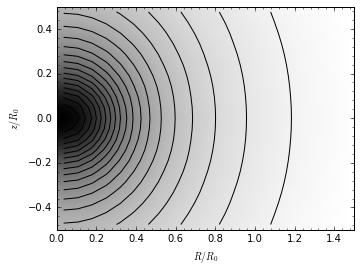

In [26]:
pmw = FP(amp = 1, a = 8*units.kpc, b = 0.35, c = 0.2375, normalize = True, omegab = 10*units.km/units.s/units.kpc)
ps = FP(amp = 1, a = 8*units.kpc, b = 0.35, c = 0.2375, normalize = True, omegab = 0.)
pmw.plot(phi = 0.4, t = 5.)
print(pmw(R=1, phi=np.pi+0.4, z=1, t=5.))
print(pmw(R=1, phi=0.4, z=1, t=5.))
print(pmw.OmegaP())

In [27]:
105/96*3.3*10**10*units.Msun

<Quantity 36093750000.0 solMass>

In [28]:
pmw.dens(1*units.kpc,0.1*units.kpc)#-pmw.dens(10*units.kpc,0.1*units.kpc, forcepoisson = True)

7.6335464371007475

# ===============================================================

In [29]:
omwa = Orbit(vxvv=[0.5,0.2,0.3,0,0.0,0]) #[R,vR,vT,z,vz,phi]
ts = np.linspace(0,20,300)
omwa.integrate(ts, pmw, method = 'leapfrog')

In [30]:
osa = Orbit(vxvv=[0.5,0.2,0.3,0,0.0,0]) #[R,vR,vT,z,vz,phi]
ts = np.linspace(0,20,300)
osa.integrate(ts, ps, method = 'leapfrog')

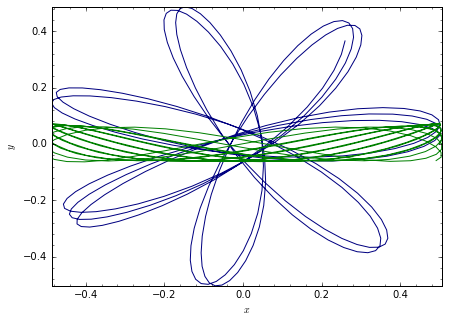

In [31]:
matplotlib.rcParams['figure.figsize'] = (7., 5.)
omwa.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'navy')
osa.plot(d1 = 'x', d2 = 'y', overplot = True, color = 'green')

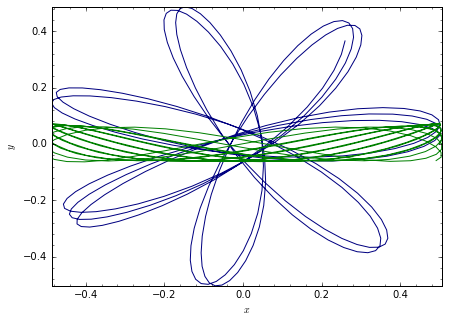

In [11]:
matplotlib.rcParams['figure.figsize'] = (7., 5.)
omwa.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'navy')
osa.plot(d1 = 'x', d2 = 'y', overplot = True, color = 'green')

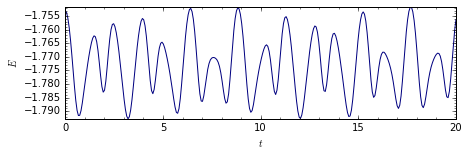

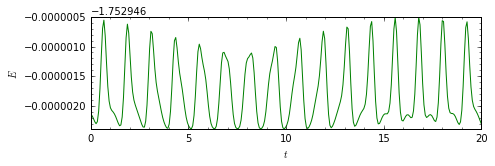

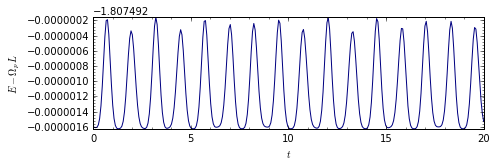

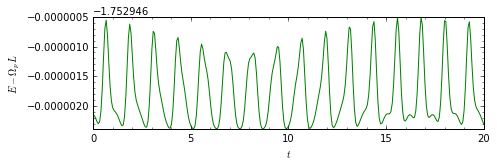

In [32]:
matplotlib.rcParams['figure.figsize'] = (7, 2)
omwa.plotE(overplot = False, color = 'navy')
osa.plotE(overplot = False, color = 'green')
omwa.plotJacobi(overplot = False, color = 'navy')
osa.plotJacobi(overplot = False, color = 'green')

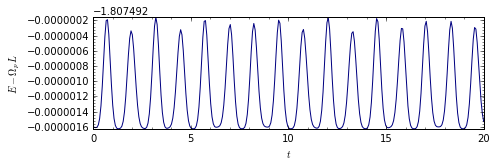

In [33]:
omwa.plot(d1 = 't', d2 = 'Jacobi', overplot = False, color = 'navy')
omwa.plot(d1 = 't', d2 = 'E', overplot = True, color = 'red')

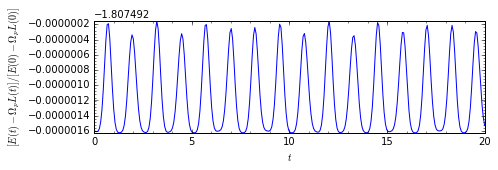

In [34]:
omwa.plotJacobi(xlabel=r'$t$',ylabel=r'$[E(t)-\Omega_pL(t)]/[E(0)-\Omega_pL(0)]$')

### Slightly varying initial conditions for chaotic orbit - does Jacobi integral conserve well enough?

In [35]:
omwb = Orbit(vxvv=[1,0.1,0.8,0,0.0,0]) #[R,vR,vT,z,vz,phi]
ts = np.linspace(0,100,1000)
omwb.integrate(ts, pmw, method = 'leapfrog')

In [40]:
omwbx = Orbit(vxvv=[1,0.1001,0.8,0,0.0,0]) #[R,vR,vT,z,vz,phi]
ts = np.linspace(0,100,1000)
omwbx.integrate(ts, pmw, method = 'leapfrog')

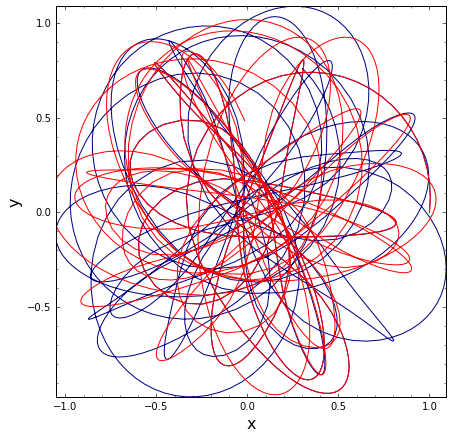

In [49]:
matplotlib.rcParams['figure.figsize'] = (7, 7)
omwb.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'navy')
omwbx.plot(d1 = 'x', d2 = 'y', overplot = True, color = 'red')
plt.xlabel('x', fontsize =16)
plt.ylabel('y', fontsize =16)

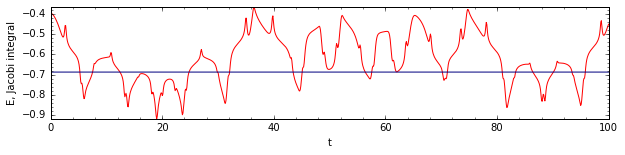

In [53]:
matplotlib.rcParams['figure.figsize'] = (10, 2)
omwb.plot(d1 = 't', d2 = 'E', overplot = False, color = 'red')
omwb.plot(d1 = 't', d2 = 'Jacobi', overplot = True, color = 'navy')
plt.xlabel('t', fontsize = 10)
plt.ylabel('E, Jacobi integral', fontsize = 10)

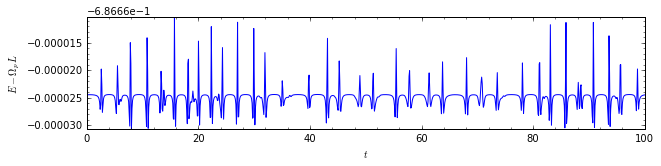

In [52]:
omwb.plotJacobi()

In [13]:
omw1 = Orbit(vxvv=[0.5,0.2,0.3,0,0.0,0]) #[R,vR,vT,z,vz,phi]
ts = np.linspace(0,15,200)
omw1.integrate(ts, pmw)

In [14]:
omw2 = Orbit(vxvv=[0.5,0.3,0.3,0,0.0,0]) #[R,vR,vT,z,vz,phi]
ts = np.linspace(0,15,200)
omw2.integrate(ts, pmw)

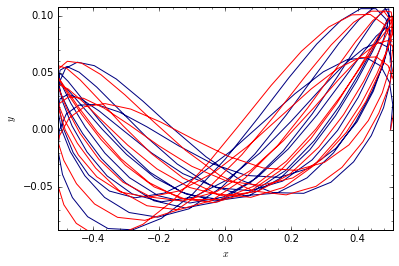

In [15]:
omw1.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'navy')#, marker = 'x')
omw2.plot(d1 = 'x', d2 = 'y', overplot = True, color = 'red')
#plt.xlim(-1,1)
#plt.ylim(-1,1)

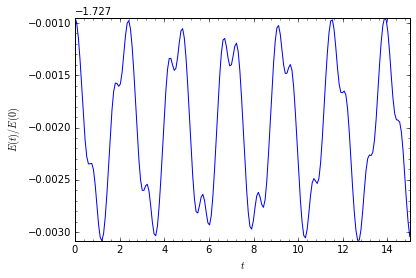

In [30]:
omw2.plotE(xlabel=r'$t$',ylabel=r'$E(t)/E(0)$')

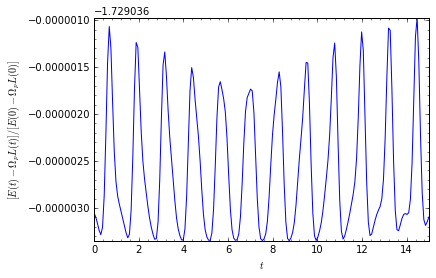

In [17]:
omw2.plotJacobi(xlabel=r'$t$',ylabel=r'$[E(t)-\Omega_pL(t)]/[E(0)-\Omega_pL(0)]$')

# ===============================================================

In [18]:
omw3 = Orbit(vxvv=[1,0.3,0.3,0,0.0,0]) #[R,vR,vT,z,vz,phi]
ts = np.linspace(0,25,300)
omw3.integrate(ts, pmw)

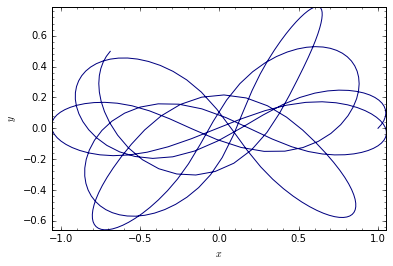

In [19]:
omw3.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'navy')

In [20]:
omw4 = Orbit(vxvv=[1,0.1,0.1,0,0.0,0]) #[R,vR,vT,z,vz,phi]
ts = np.linspace(0,25,300)
omw4.integrate(ts, pmw)

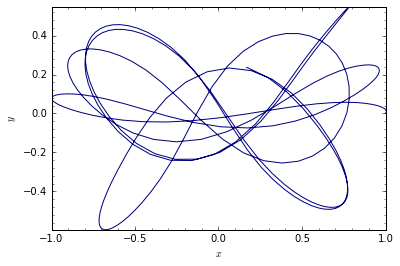

In [21]:
omw4.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'navy')

In [22]:
omw5 = Orbit(vxvv=[1,0.2,0.2,0,0.0,0]) #[R,vR,vT,z,vz,phi]
ts = np.linspace(0,25,300)
omw5.integrate(ts, pmw)

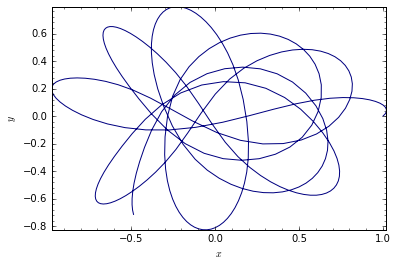

In [23]:
omw5.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'navy')

In [107]:
omw6 = Orbit(vxvv=[1,0.4,0.4,0,0.0,0]) #[R,vR,vT,z,vz,phi]
ts = np.linspace(0,35,300)
omw6.integrate(ts, pmw)

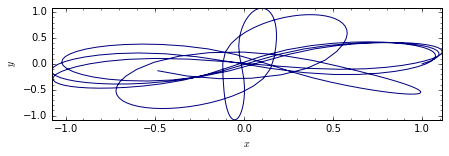

In [108]:
omw6.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'navy')

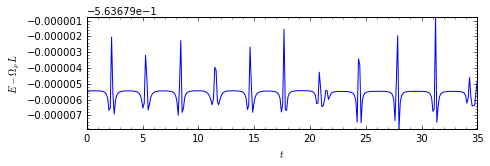

In [109]:
omw6.plotJacobi()

In [26]:
omw7 = Orbit(vxvv=[1,0.1,0.4,0,0.0,0]) #[R,vR,vT,z,vz,phi]
ts = np.linspace(0,25,300)
omw7.integrate(ts, pmw)

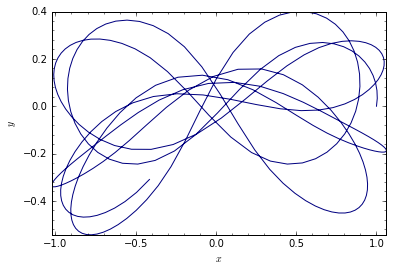

In [27]:
omw7.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'navy')

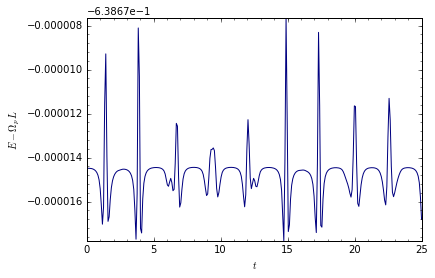

In [31]:
omw7.plot(d1 = 't', d2 = 'Jacobi', overplot = False, color = 'navy')

In [32]:
pmw = FP(amp = 1, a = 8*units.kpc, b = 1, c = 1, normalize = True, omegab = 0.1)
omw8 = Orbit(vxvv=[1,0.1,0.8,0,0.0,0]) #[R,vR,vT,z,vz,phi]
ts = np.linspace(0,90,1300)
omw8.integrate(ts, pmw)

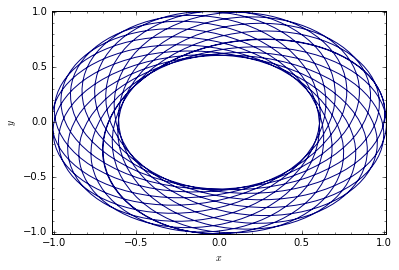

In [33]:
omw8.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'navy')
# pmw = OFP(amp = 1, a = 8*units.kpc, b = 1, c = 1, normalize = True, omegab = 0.1)
# omw8 = Orbit(vxvv=[1,0.1,0.8,0,0.0,0]) #[R,vR,vT,z,vz,phi]
# ts = np.linspace(0,90,1300)
# omw8.integrate(ts, pmw)

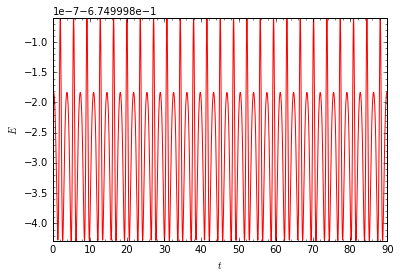

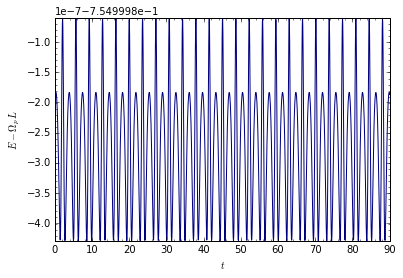

In [41]:
omw8.plot(d1 = 't', d2 = 'E', overplot = False, color = 'red')
omw8.plot(d1 = 't', d2 = 'Jacobi', overplot = False, color = 'navy')

### Testing whether orbit in axisymmetric potential depends on pattern speed - it does not anymore :)

In [44]:
pmw = FP(amp = 1, a = 8*units.kpc, b = 1, c = 1, normalize = True, omegab = 0.)
mw8 = Orbit(vxvv=[1,0.1,0.8,0,0.0,0]) #[R,vR,vT,z,vz,phi]
ts = np.linspace(0,15,150)
mw8.integrate(ts, pmw, method = 'leapfrog')

In [71]:
pmw = FP(amp = 1, a = 8*units.kpc, b = 1, c = 1, normalize = True, omegab = 0.001)
mw9 = Orbit(vxvv=[1,0.1,0.8,0,0.0,0]) #[R,vR,vT,z,vz,phi]
ts = np.linspace(0,15,150)
mw9.integrate(ts, pmw, method = 'leapfrog')

In [72]:
pmw = FP(amp = 1, a = 8*units.kpc, b = 1, c = 1, normalize = True, omegab = 0.6)
mw10 = Orbit(vxvv=[1,0.1,0.8,0,0.0,0]) #[R,vR,vT,z,vz,phi]
ts = np.linspace(0,15,150)
mw10.integrate(ts, pmw, method = 'leapfrog')

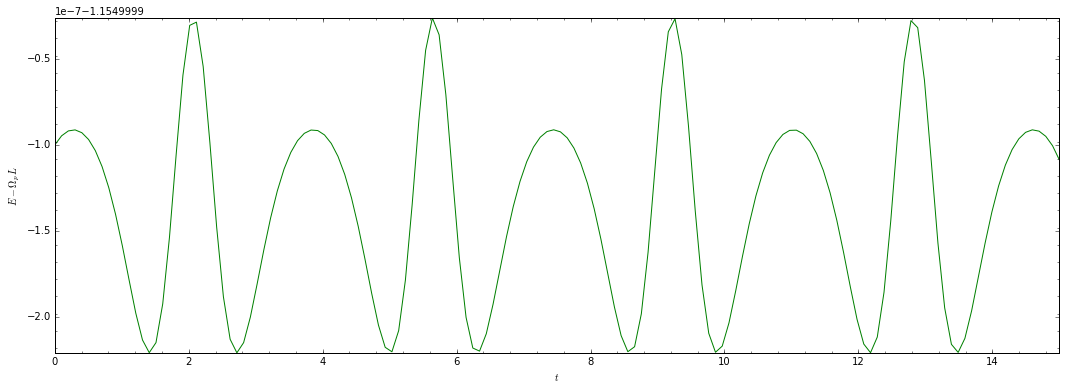

In [74]:
mw10.plot(d1 = 't', d2 = 'Jacobi', overplot = False, color = 'green')

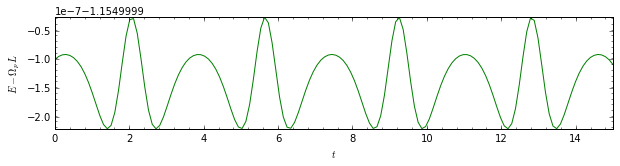

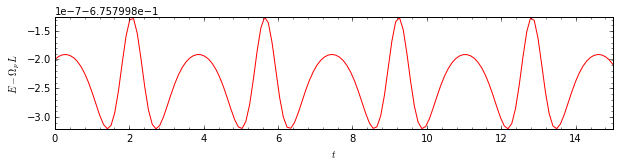

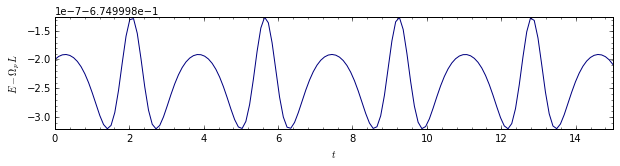

In [78]:
matplotlib.rcParams['figure.figsize'] = (10.0, 2)
mw10.plot(d1 = 't', d2 = 'Jacobi', overplot = False, color = 'green')
mw9.plot(d1 = 't', d2 = 'Jacobi', overplot = False, color = 'red')
mw8.plot(d1 = 't', d2 = 'Jacobi', overplot = False, color = 'navy')

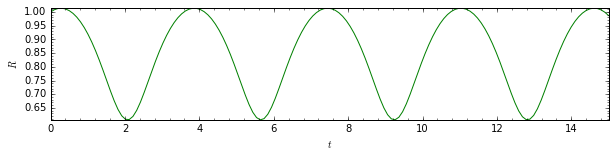

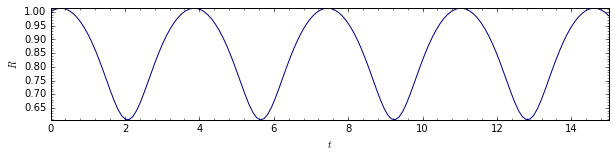

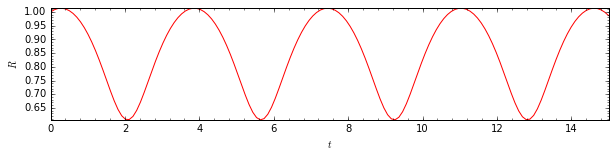

In [79]:
mw10.plot(d1 = 't', d2 = 'R', overplot = False, color = 'green')
mw8.plot(d1 = 't', d2 = 'R', overplot = False, color = 'navy')
mw9.plot(d1 = 't', d2 = 'R', overplot = False, color = 'red')

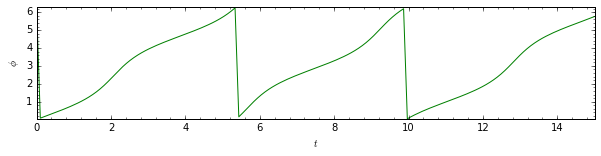

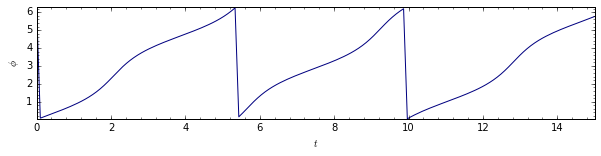

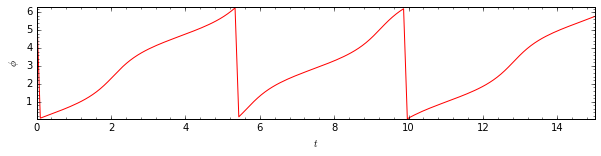

In [80]:
mw10.plot(d1 = 't', d2 = 'phi', overplot = False, color = 'green')
mw8.plot(d1 = 't', d2 = 'phi', overplot = False, color = 'navy')
mw9.plot(d1 = 't', d2 = 'phi', overplot = False, color = 'red')

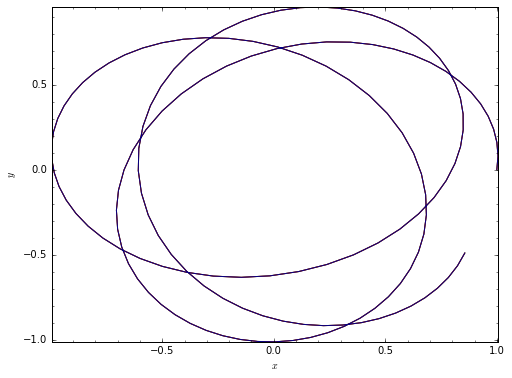

In [83]:
matplotlib.rcParams['figure.figsize'] = (8, 6)
mw10.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'green')
mw9.plot(d1 = 'x', d2 = 'y', overplot = True, color = 'red')
mw8.plot(d1 = 'x', d2 = 'y', overplot = True, color = 'navy')

In [ ]:
#mw8.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'navy') #omegab = 0.01

### ==================== Units used when setting the parameters of orbits ====================

In [11]:
fp = FP(c=0.3, b=0.5, normalize = True, omegab = 0) # a = 5 by default

In [12]:
o = Orbit(vxvv=[1,1,1,1,0.,1.])
ts = np.linspace(0,50,250)
o.integrate(ts, fp)

In [13]:
oo = Orbit(vxvv=[1,1,1,1,1,0.])
ts = np.linspace(0,50,250)
oo.integrate(ts, fp)

(-2, 2)

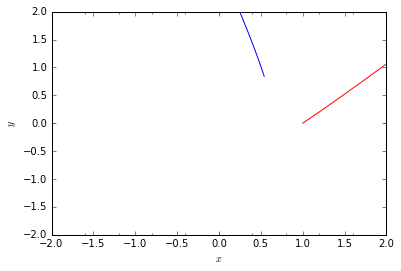

In [14]:
o.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'blue')
oo.plot(d1 = 'x', d2 = 'y', overplot = True, color = 'red')
plt.xlim(-2,2)
plt.ylim(-2,2)

In [15]:
ooo = Orbit(vxvv=[1,1,1,1,0.1,0.])
ts = np.linspace(0,20,150)
ooo.integrate(ts, fp)

/home/annaj/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)



(-1, 1)

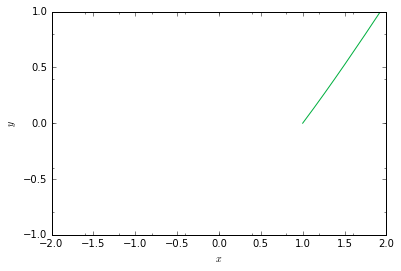

In [16]:
ooo.plot(d1 = 'x', d2 = 'y', color = '#00AF3F')
plt.xlim(-2,2)
plt.ylim(-1,1)

In [17]:
o = Orbit(vxvv=[1,1,1,1,0.,1.])
ts = np.linspace(0,50,350)
o.integrate(ts, fp)

KeyboardInterrupt: 

In [ ]:
o.plot(d1 = 'x', d2 = 'y', color = '#00AF3F')
plt.xlim(-1,1)
plt.ylim(-1.5,1.5)

In [ ]:
o.Tp(fp, type ='isochroneApprox', b = 1)

In [ ]:
oo2 = Orbit(vxvv=[1,1,1,1,1,0.])
ts2 = np.linspace(0,6.7,30)
oo2.integrate(ts2, fp)
oo2.plot(d1 = 'x', d2 = 'y')

In [ ]:
o3 = Orbit(vxvv=[8.*units.kpc,22.*units.km/units.s,242*units.km/units.s,0.*units.kpc,22.*units.km/units.s,0.*units.deg])
ts3 = np.linspace(0,6.47,30)
o3.integrate(ts3, fp)

In [ ]:
o3.plot(d1 = 'x', d2 = 'y')
plt.xlim(-10,10)
plt.ylim(-10,10)

### ==================== Rotating potential plot - reasonable omegab set ====================

In [55]:
#fp = FP(c=0.3, b=0.5, normalize = True, glorder = None, omegab = 0)
ofp = FP(a = 8*units.kpc, b = 0.35, c = 0.2375, normalize = True, omegab = 2*np.pi) #Pattern rotational period = 1 

In [56]:
-(ofp(R=1,z=1,phi=1,t=0)-ofp(R=1,z=1,phi=1,t=10000))/ofp(R=1,z=1,phi=1,t=0)

-3.2987801552663175e-14

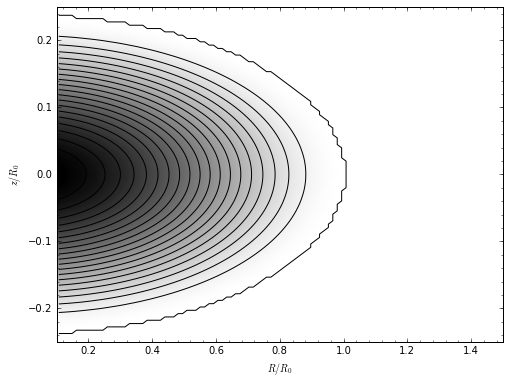

In [57]:
from galpy.potential import plotDensities
plotDensities(ofp,rmin=0.1,zmax=0.25,zmin=-0.25,nrs=101,nzs=101, phi = 0)

In [58]:
ofp.dens(2*units.kpc,0.1,t = 0.5) == ofp.dens(2*units.kpc,0.1,t = 1)

True

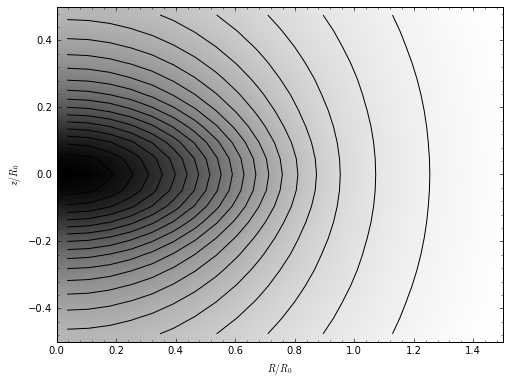

In [59]:
ofp.plot(phi = 0, t = 0., zmin=-0.5, zmax = 0.5)

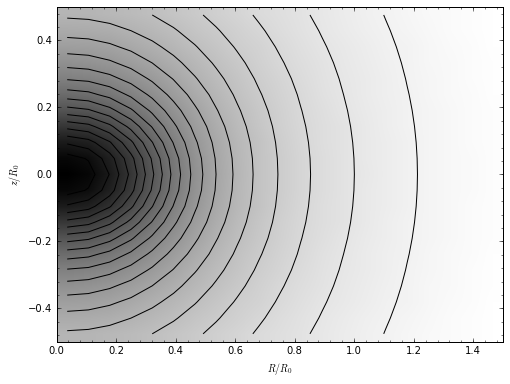

In [60]:
ofp.plot(phi = 0, t = 0.125, zmin=-0.5, zmax = 0.5)

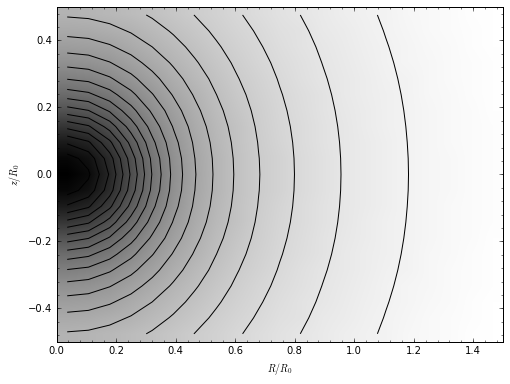

In [61]:
ofp.plot(phi = 0, t = 0.25, zmin=-0.5, zmax = 0.5)

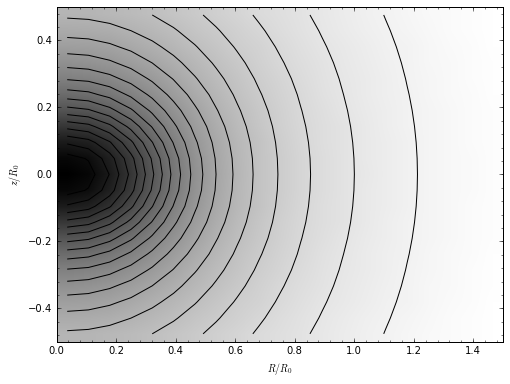

In [62]:
ofp.plot(phi = 0, t = 0.375, zmin=-0.5, zmax = 0.5)

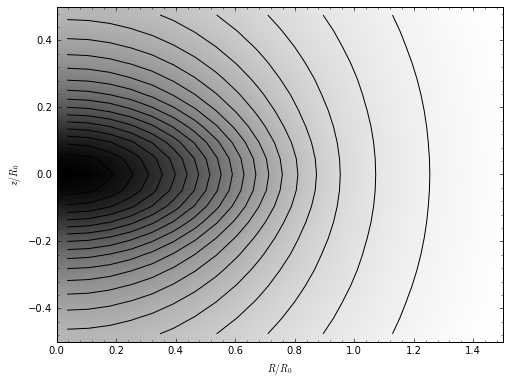

In [63]:
ofp.plot(phi = 0, t = 0.5, zmin=-0.5, zmax = 0.5)

### ========== Proof that orbits in rotating potential differ from those in the steady one ==========

In [92]:
fp = FP(c=0.3, b=0.5, normalize = True, omegab = 0.0)
ofp = FP(c=0.3, b=0.5, normalize = True, omegab = 0.02)

# equality of reasults from the two available ways of evaluating the density:
''' 
for i in range(1,20):
    #print(ofp.dens(1+i/10,1,0)-ofp.dens(1+i/10,1,0,forcepoisson=True))
    print((ofp.dens(i,1,0)-ofp.dens(i,1,0,forcepoisson=True))/ofp.dens(i,1,0))
print()
for i in range(1,20):
    #print(ofp.dens(1,1+i/10,0)-ofp.dens(1,1+i/10,0,forcepoisson=True))
    print((ofp.dens(1,i,0)-ofp.dens(1,i,0,forcepoisson=True))/ofp.dens(1,i,0))
'''

' \nfor i in range(1,20):\n    #print(ofp.dens(1+i/10,1,0)-ofp.dens(1+i/10,1,0,forcepoisson=True))\n    print((ofp.dens(i,1,0)-ofp.dens(i,1,0,forcepoisson=True))/ofp.dens(i,1,0))\nprint()\nfor i in range(1,20):\n    #print(ofp.dens(1,1+i/10,0)-ofp.dens(1,1+i/10,0,forcepoisson=True))\n    print((ofp.dens(1,i,0)-ofp.dens(1,i,0,forcepoisson=True))/ofp.dens(1,i,0))\n'

In [93]:
ts = np.linspace(0,30,300)
# reasonable number of points (with respect to integration time)
# EDIT: not necessarily!!! depends on initial conditions!

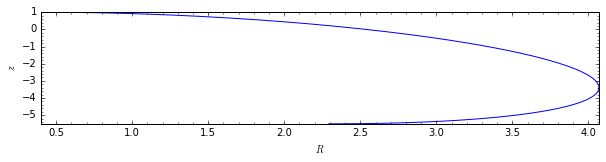

In [96]:
o = Orbit(vxvv=[0.4,1,0.1,1,0.,1.]) #o=Orbit(vxvv=[R,vR,vT,phi])
o.integrate(ts, ofp, method = 'leapfrog' )
o.plot()

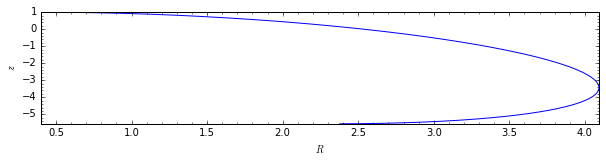

In [97]:
o = Orbit(vxvv=[0.4,1,0.1,1,0.,1.]) #o=Orbit(vxvv=[R,vR,vT,phi])
o.integrate(ts, fp, method = 'leapfrog' )
o.plot()

### ==================== Density and potential plotted in the same scale ====================

In [ ]:
from galpy.potential import plotDensities
plotDensities(ofp, phi = 0.3, zmin = -0.5, zmax = 0.5)

In [ ]:
ofp.plot(phi = 0.3, t = 10., zmin=-0.5, zmax = 0.5)

### ==================== Testing the TD version of the Ferrers potential ====================

/home/annaj/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)



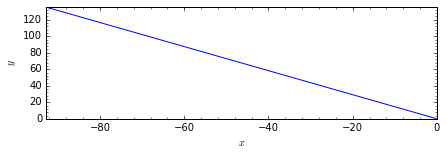

In [110]:
ts2 = np.linspace(0,50,400)
o3d = Orbit(vxvv=[0.1,3,2,0.5,0.,np.pi/2]) #o=Orbit(vxvv=[R,vR,vT,z,vz,phi])
o3d.integrate(ts2, fp, method = 'leapfrog' )
o3d.plot(d1 = 'x', d2 = 'y')

/home/annaj/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)



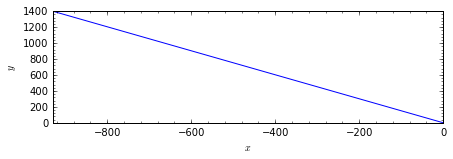

In [111]:
ts3 = np.linspace(0,500,400)
o3d = Orbit(vxvv=[0.1,3.1,2,0.5,0.,np.pi/2]) #o=Orbit(vxvv=[R,vR,vT,z,vz,phi])
o3d.integrate(ts3, ofp, method = 'leapfrog' )
o3d.plot(d1 = 'x', d2 = 'y')

In [112]:
ts2 = np.linspace(0,10,100)
fp2 = FP(b = 0.7, c = 0.4, glorder = None, omegab = 0)
o2d0 = Orbit(vxvv=[10,10.,30.,0.2]) #o=Orbit(vxvv=[R,vR,vT,phi])
o2d0.integrate(ts2, fp2)
o2d0.plot()

TypeError: __init__() got an unexpected keyword argument 'glorder'

In [ ]:
ts2 = np.linspace(1,10,100)
ofp2 = FP(b = 0.7, c = 0.4, glorder = None, omegab = 0.08)
o2d0 = Orbit(vxvv=[10,10.,30.,0.2]) #o=Orbit(vxvv=[R,vR,vT,phi])
o2d0.integrate(ts2, ofp2)
o2d0.plot()

In [ ]:
ts = np.linspace(0,20,100)
o2d0 = Orbit(vxvv=[3,3.,3.,0.2]) #o=Orbit(vxvv=[R,vR,vT,phi]) #4:51-5:10
o2d0.integrate(ts, ofp)
o2d0.plot()

In [ ]:
from galpy.potential import epifreq
epifreq(fp,0.8)

In [ ]:
# one of runtime warnings/errors I get: 

np.seterr('warn')
pot = FP(c=0.3, b=0.5, normalize = True, omegab = 0.01*2*np.pi)
ts2 = np.linspace(0,142.5,400)
o3d = Orbit(vxvv=[0.5,.7,2,0.5,0.,0]) #o=Orbit(vxvv=[R,vR,vT,z,vz,phi])
o3d.integrate(ts2, pot, method = 'leapfrog' )
o3d.plot(d1 = 'x', d2 = 'y')

In [ ]:
potsteady = FP(c=0.3, b=0.5, normalize = True, omegab = 0.05)
ts2 = np.linspace(0,7.455,400)
o3d = Orbit(vxvv=[5,5.7,20,0.5,0.1,0], ro = 8., vo = 220.) #o=Orbit(vxvv=[R,vR,vT,z,vz,phi])
o3d.integrate(ts2, potsteady, method = 'leapfrog' )
o3d.plot(d1 = 'x', d2 = 'y')